In [1]:
import gym
from src import algo

2022-01-27 22:09:52.435453: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-01-27 22:09:52.435512: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
# Creating the environment
from env.SimpleMaze import SimpleMaze
env = SimpleMaze(3,5,True)

Map:
0 G 0 * * 
0 0 * X 0 
0 0 0 0 0 


## DQN 1000 episodes

In [3]:
# Training an RL agent in the environment using given algorithm
model, agent = algo.dqn(env,1000)

2022-01-27 22:09:55.856172: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-27 22:09:55.856893: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-01-27 22:09:55.857039: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-01-27 22:09:55.857160: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-01-27 22:09:55.857269: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

Training for 1000 steps ...
Interval 1 (0 steps performed)
   76/10000 [..............................] - ETA: 13s - reward: -0.0789

/usr/local/lib/python3.9/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


  995/10000 [=>............................] - ETA: 1:28 - reward: -0.7487done, took 9.937 seconds


In [4]:
# Generating dataset for ANN to DT conversion
from src.data import dataset
filename = "simple_maze_3_by_5_data.csv"
dataset(env,model,filename)

100%|████████████████████████████████████| 99856/99856 [02:36<00:00, 636.29it/s]


In [5]:
# Building DT from the dataset
from src.tree import build_tree
Tree = build_tree(env,filename)

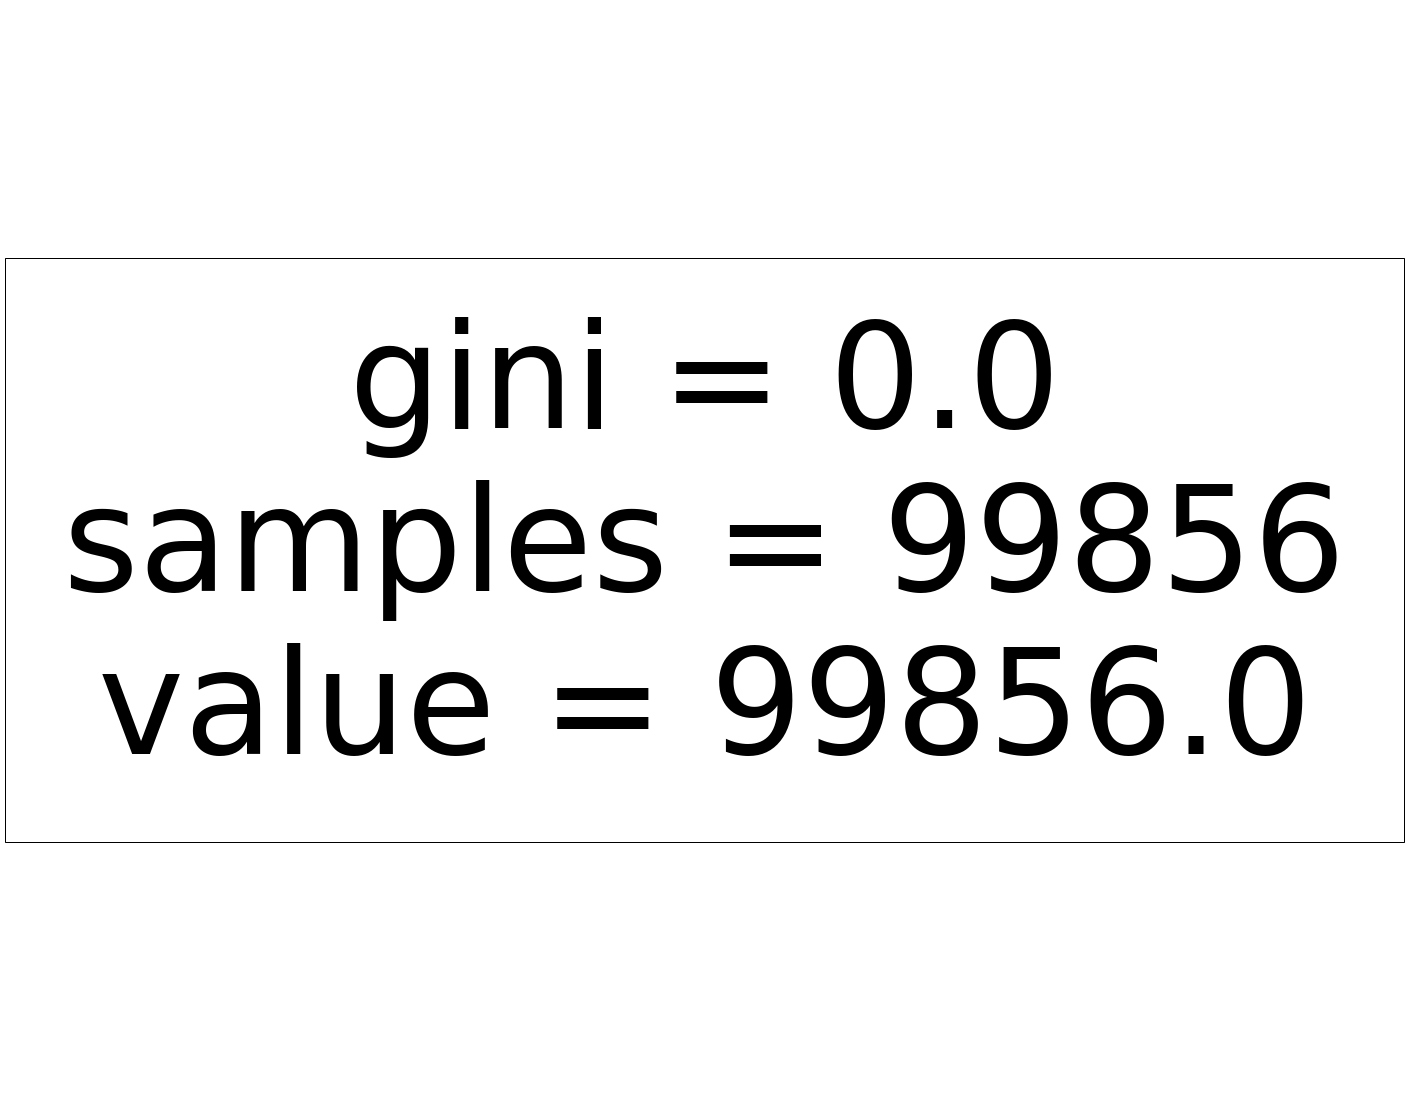

In [6]:
# Visualizing the DT
from src.tree import visualize_tree
plt = visualize_tree(env,Tree)
plt.savefig("simple_maze_3_by_5_tree.png")

In [7]:
# Testing DT against ANN for accuracy
from src.tree import test_tree
test_tree(env,model,Tree,10000)

100%|████████████████████████████████████| 10000/10000 [00:18<00:00, 533.67it/s]

Instances checked: 10000
Predictions matched: 10000
Accuracy: 100.0%


## DQN 2000 Episodes

In [8]:
# Training an RL agent in the environment using given algorithm
model, agent = algo.dqn(env,2000)

Training for 2000 steps ...
Interval 1 (0 steps performed)
   34/10000 [..............................] - ETA: 15s - reward: 0.7647   

/usr/local/lib/python3.9/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


 1999/10000 [====>.........................] - ETA: 1:19 - reward: -1.7684done, took 20.030 seconds


In [9]:
# Generating dataset for ANN to DT conversion
!rm "simple_maze_3_by_5_data.csv"
filename = "simple_maze_3_by_5_data.csv"
dataset(env,model,filename)

100%|████████████████████████████████████| 99856/99856 [02:41<00:00, 617.22it/s]


In [10]:
# Building DT from the dataset
Tree = build_tree(env,filename)

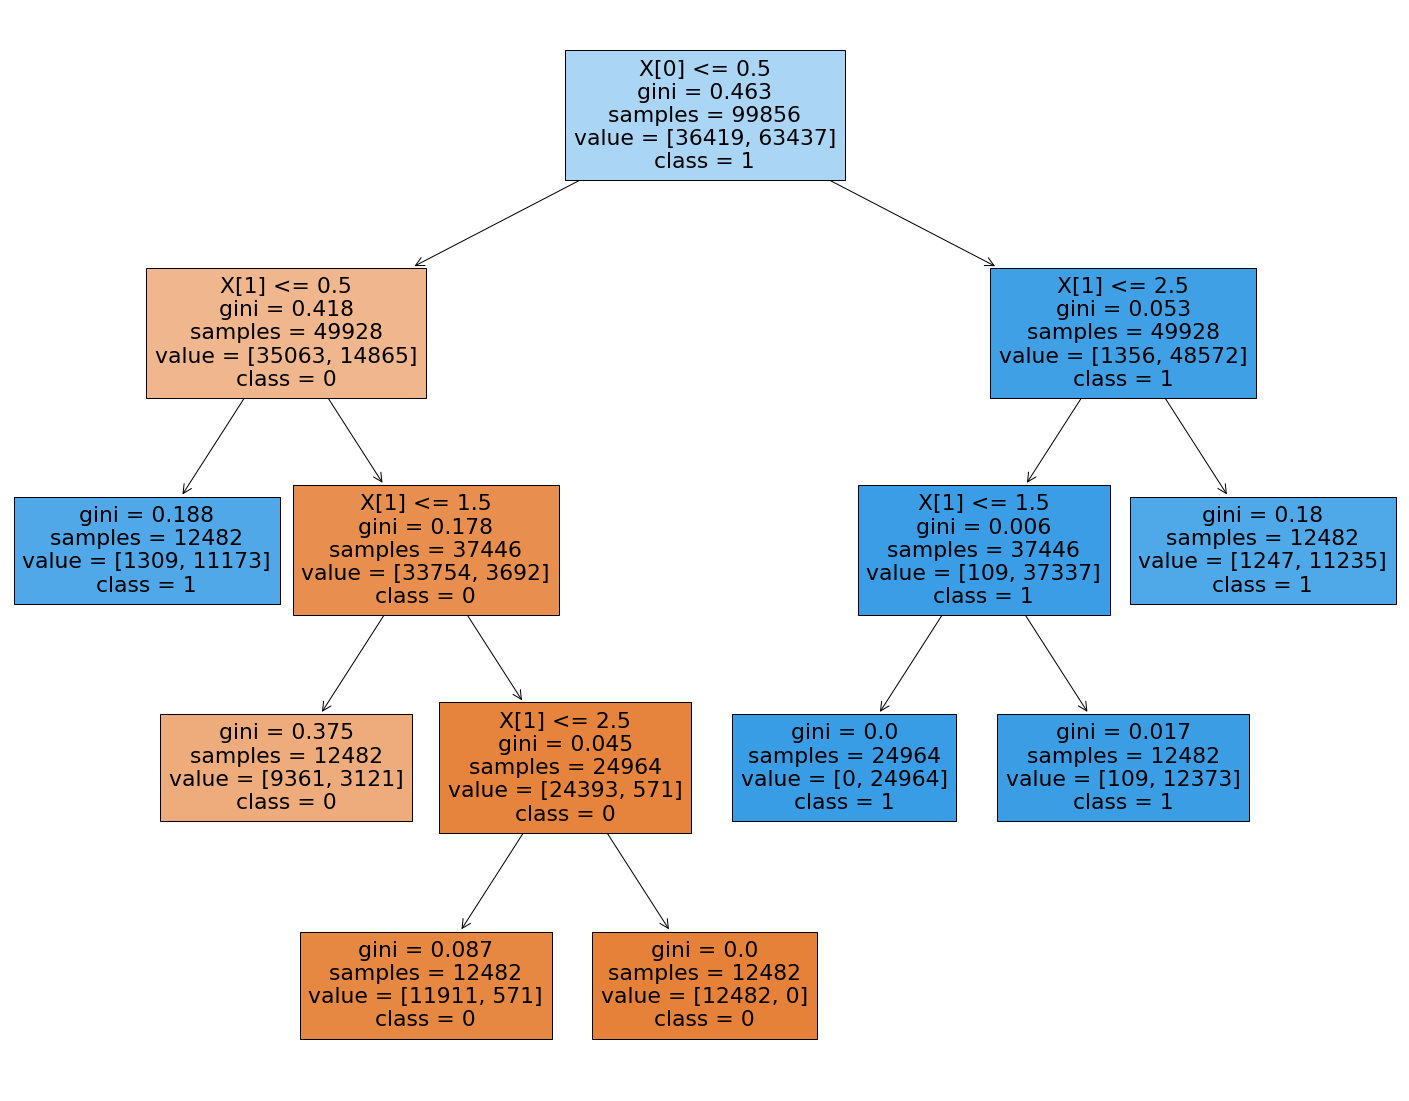

In [11]:
# Visualizing the DT
plt = visualize_tree(env,Tree)
plt.savefig("simple_maze_3_by_5_tree.png")

In [12]:
# Testing DT against ANN for accuracy
test_tree(env,model,Tree,10000)

100%|████████████████████████████████████| 10000/10000 [00:19<00:00, 525.84it/s]

Instances checked: 10000
Predictions matched: 8174
Accuracy: 81.74%


## DQN 5000 Episodes

In [13]:
# Training an RL agent in the environment using given algorithm
model, agent = algo.dqn(env,5000)

Training for 5000 steps ...
Interval 1 (0 steps performed)
    1/10000 [..............................] - ETA: 29:39 - reward: 9.0000

/usr/local/lib/python3.9/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


 4997/10000 [=============>................] - ETA: 50s - reward: -1.4539done, took 50.982 seconds


In [14]:
# Generating dataset for ANN to DT conversion
!rm "simple_maze_3_by_5_data.csv"
filename = "simple_maze_3_by_5_data.csv"
dataset(env,model,filename)

100%|████████████████████████████████████| 99856/99856 [02:47<00:00, 596.92it/s]


In [15]:
# Building DT from the dataset
Tree = build_tree(env,filename)

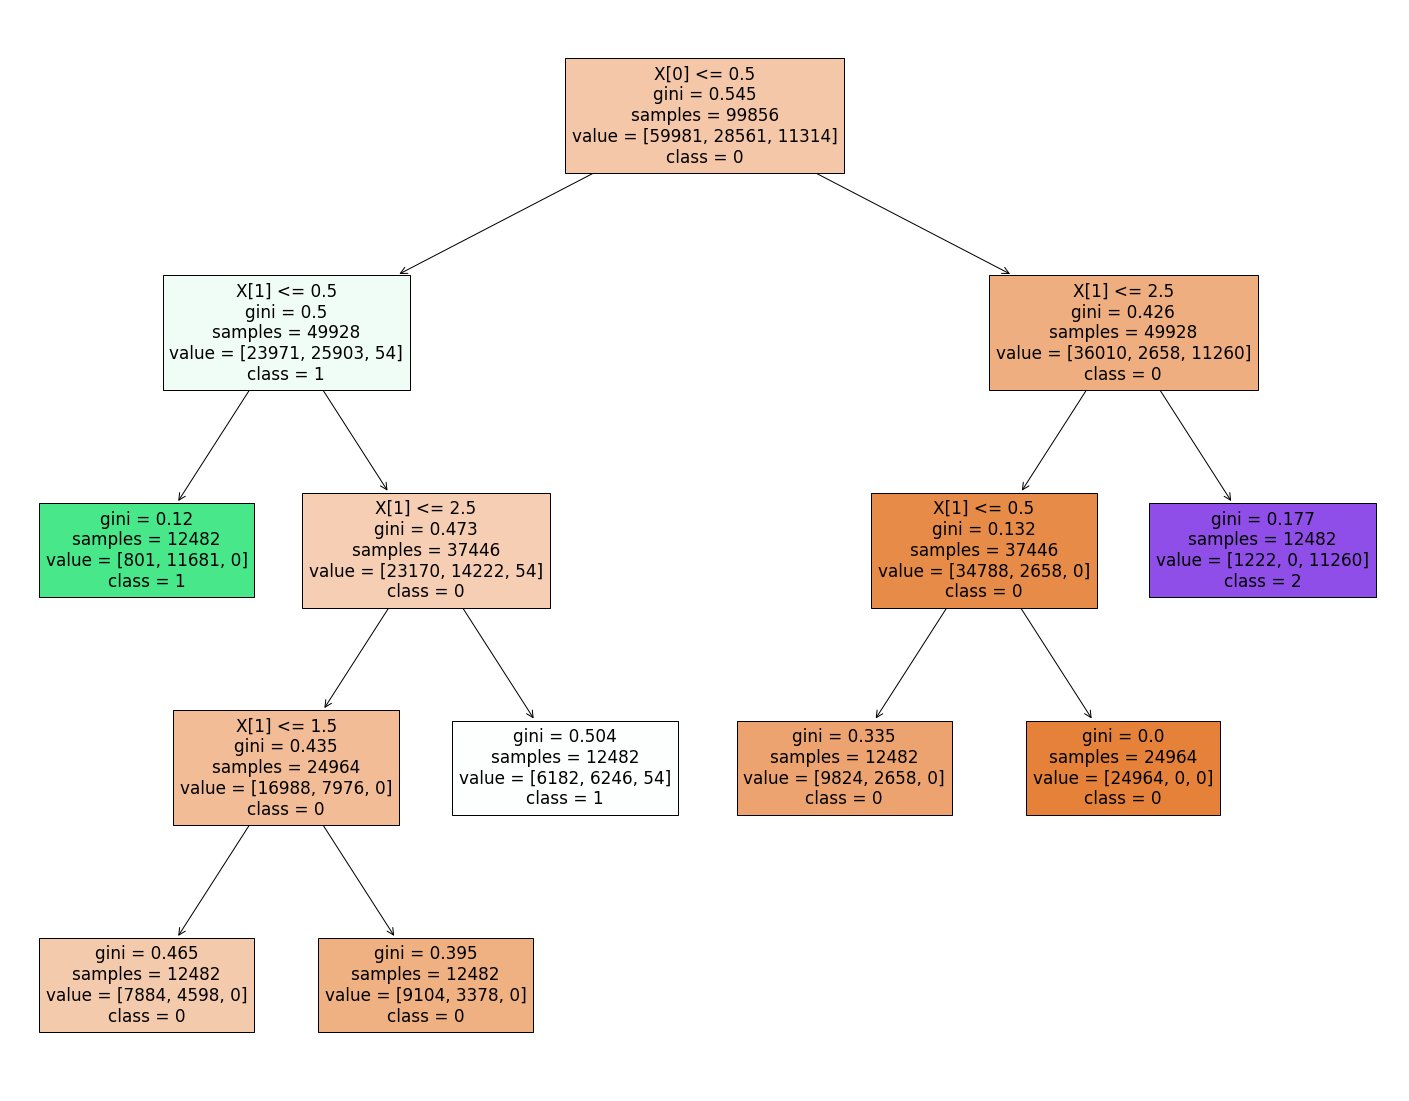

In [16]:
# Visualizing the DT
plt = visualize_tree(env,Tree)
plt.savefig("simple_maze_3_by_5_tree.png")

In [17]:
# Testing DT against ANN for accuracy
test_tree(env,model,Tree,10000)

100%|████████████████████████████████████| 10000/10000 [00:19<00:00, 506.91it/s]

Instances checked: 10000
Predictions matched: 6450
Accuracy: 64.5%


## DQN 10000 Episodes

In [18]:
# Training an RL agent in the environment using given algorithm
model, agent = algo.dqn(env,10000)

Training for 10000 steps ...
Interval 1 (0 steps performed)


/usr/local/lib/python3.9/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


10000/10000 [==============================] - 107s 11ms/step - reward: -1.5150
done, took 106.671 seconds


In [19]:
# Generating dataset for ANN to DT conversion
!rm "simple_maze_3_by_5_data.csv"
filename = "simple_maze_3_by_5_data.csv"
dataset(env,model,filename)

100%|████████████████████████████████████| 99856/99856 [02:50<00:00, 587.11it/s]


In [20]:
# Building DT from the dataset
Tree = build_tree(env,filename)

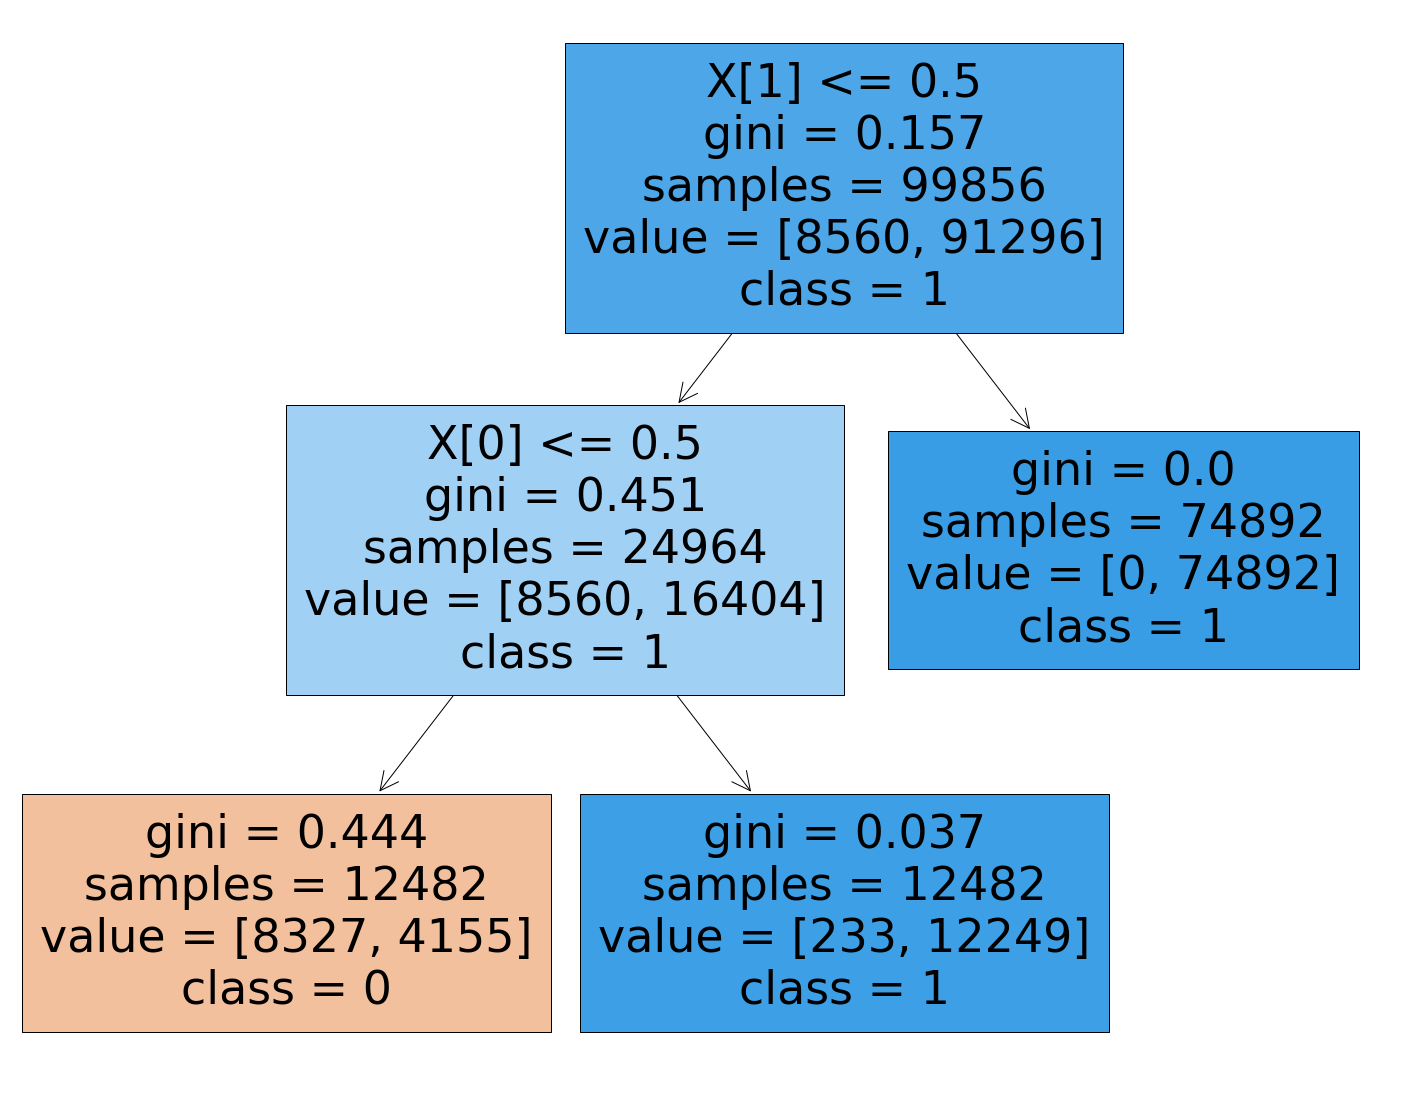

In [21]:
# Visualizing the DT
plt = visualize_tree(env,Tree)
plt.savefig("simple_maze_3_by_5_tree.png")

In [22]:
# Testing DT against ANN for accuracy
test_tree(env,model,Tree,10000)

100%|████████████████████████████████████| 10000/10000 [00:19<00:00, 503.31it/s]

Instances checked: 10000
Predictions matched: 9436
Accuracy: 94.36%


## DQN 20000 Episodes

In [23]:
# Training an RL agent in the environment using given algorithm
model, agent = algo.dqn(env,20000)

Training for 20000 steps ...
Interval 1 (0 steps performed)


/usr/local/lib/python3.9/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


10000/10000 [==============================] - 109s 11ms/step - reward: -1.8512
147 episodes - episode_reward: -125.912 [-2897.000, 36.000] - loss: 35.465 - mse: 2578.404 - mean_q: -53.946

Interval 2 (10000 steps performed)
10000/10000 [==============================] - 111s 11ms/step - reward: -1.5170
done, took 220.260 seconds


In [24]:
# Generating dataset for ANN to DT conversion
!rm "simple_maze_3_by_5_data.csv"
filename = "simple_maze_3_by_5_data.csv"
dataset(env,model,filename)

100%|████████████████████████████████████| 99856/99856 [02:54<00:00, 570.75it/s]


In [25]:
# Building DT from the dataset
Tree = build_tree(env,filename)

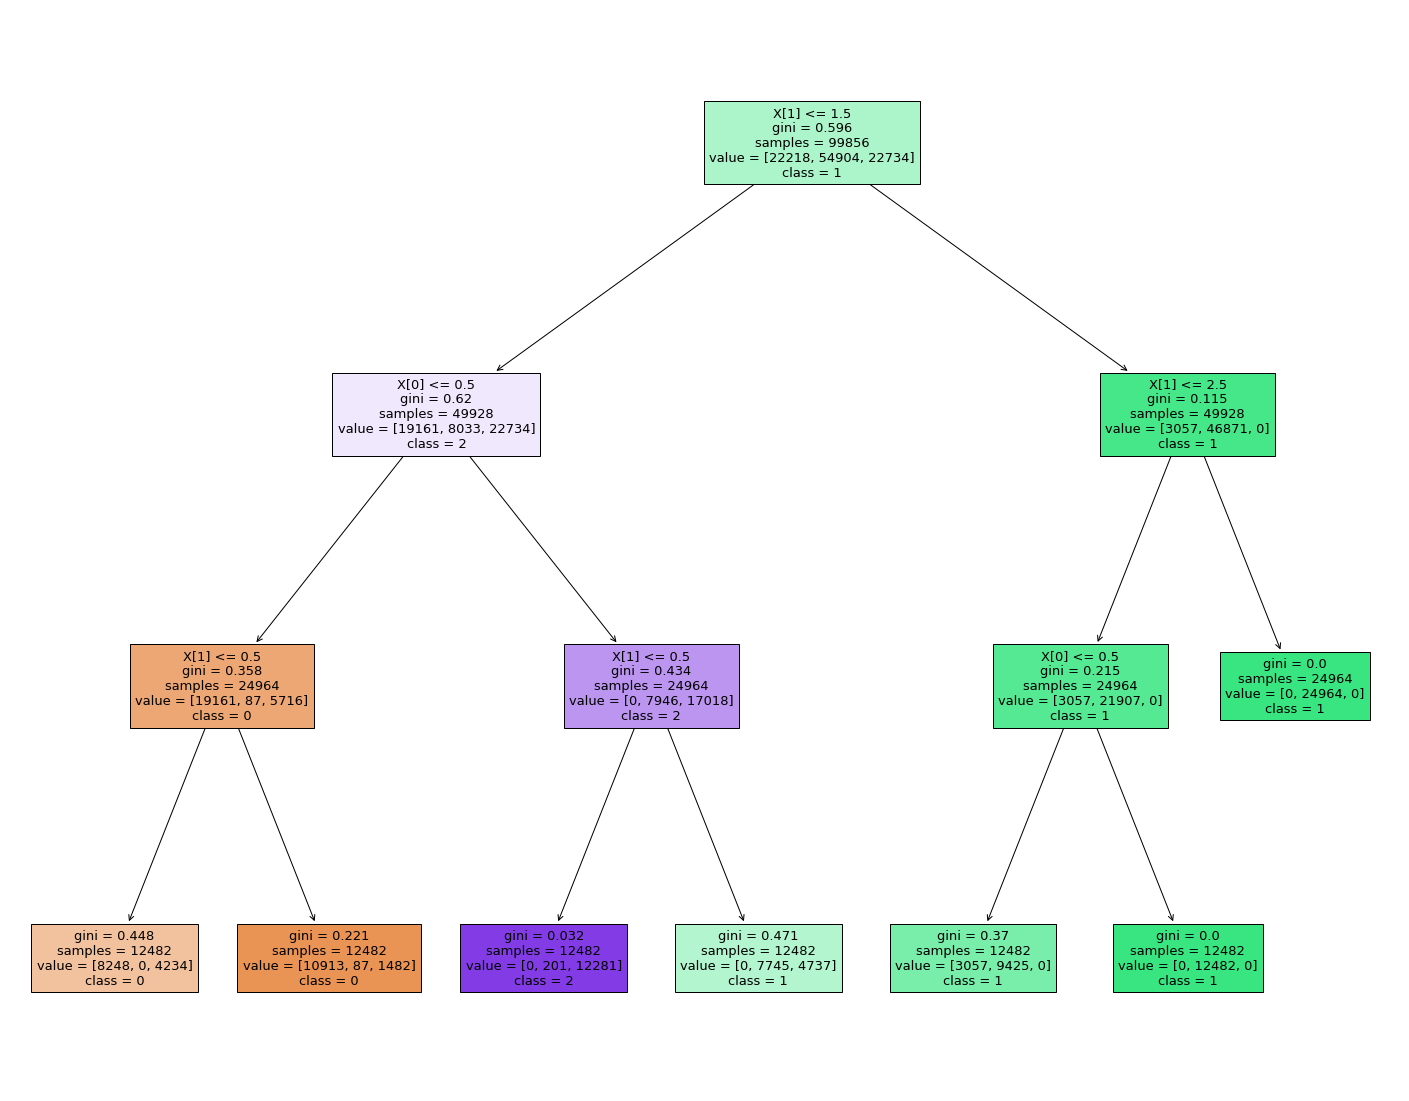

In [26]:
# Visualizing the DT
plt = visualize_tree(env,Tree)
plt.savefig("simple_maze_3_by_5_tree.png")

In [27]:
# Testing DT against ANN for accuracy
test_tree(env,model,Tree,10000)

100%|████████████████████████████████████| 10000/10000 [00:20<00:00, 491.99it/s]

Instances checked: 10000
Predictions matched: 7388
Accuracy: 73.88%


## DQN 50000 Episodes

In [28]:
# Training an RL agent in the environment using given algorithm
model, agent = algo.dqn(env,50000)

Training for 50000 steps ...
Interval 1 (0 steps performed)


/usr/local/lib/python3.9/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


10000/10000 [==============================] - 112s 11ms/step - reward: -1.7666
245 episodes - episode_reward: -72.135 [-3107.000, 40.000] - loss: 23.127 - mse: 595.883 - mean_q: -24.383

Interval 2 (10000 steps performed)
10000/10000 [==============================] - 118s 12ms/step - reward: -0.7656
418 episodes - episode_reward: -18.246 [-1260.000, 39.000] - loss: 28.746 - mse: 431.097 - mean_q: -21.654

Interval 3 (20000 steps performed)
10000/10000 [==============================] - 122s 12ms/step - reward: 0.1706
638 episodes - episode_reward: 2.633 [-575.000, 39.000] - loss: 19.262 - mse: 86.513 - mean_q: -8.026

Interval 4 (30000 steps performed)
10000/10000 [==============================] - 124s 12ms/step - reward: 0.1570
603 episodes - episode_reward: 2.590 [-456.000, 36.000] - loss: 13.690 - mse: 9.336 - mean_q: 0.121

Interval 5 (40000 steps performed)
10000/10000 [==============================] - 129s 13ms/step - reward: 0.2394
done, took 605.600 seconds


In [29]:
# Generating dataset for ANN to DT conversion
!rm "simple_maze_3_by_5_data.csv"
filename = "simple_maze_3_by_5_data.csv"
dataset(env,model,filename)

100%|████████████████████████████████████| 99856/99856 [02:57<00:00, 561.63it/s]


In [30]:
# Building DT from the dataset
Tree = build_tree(env,filename)

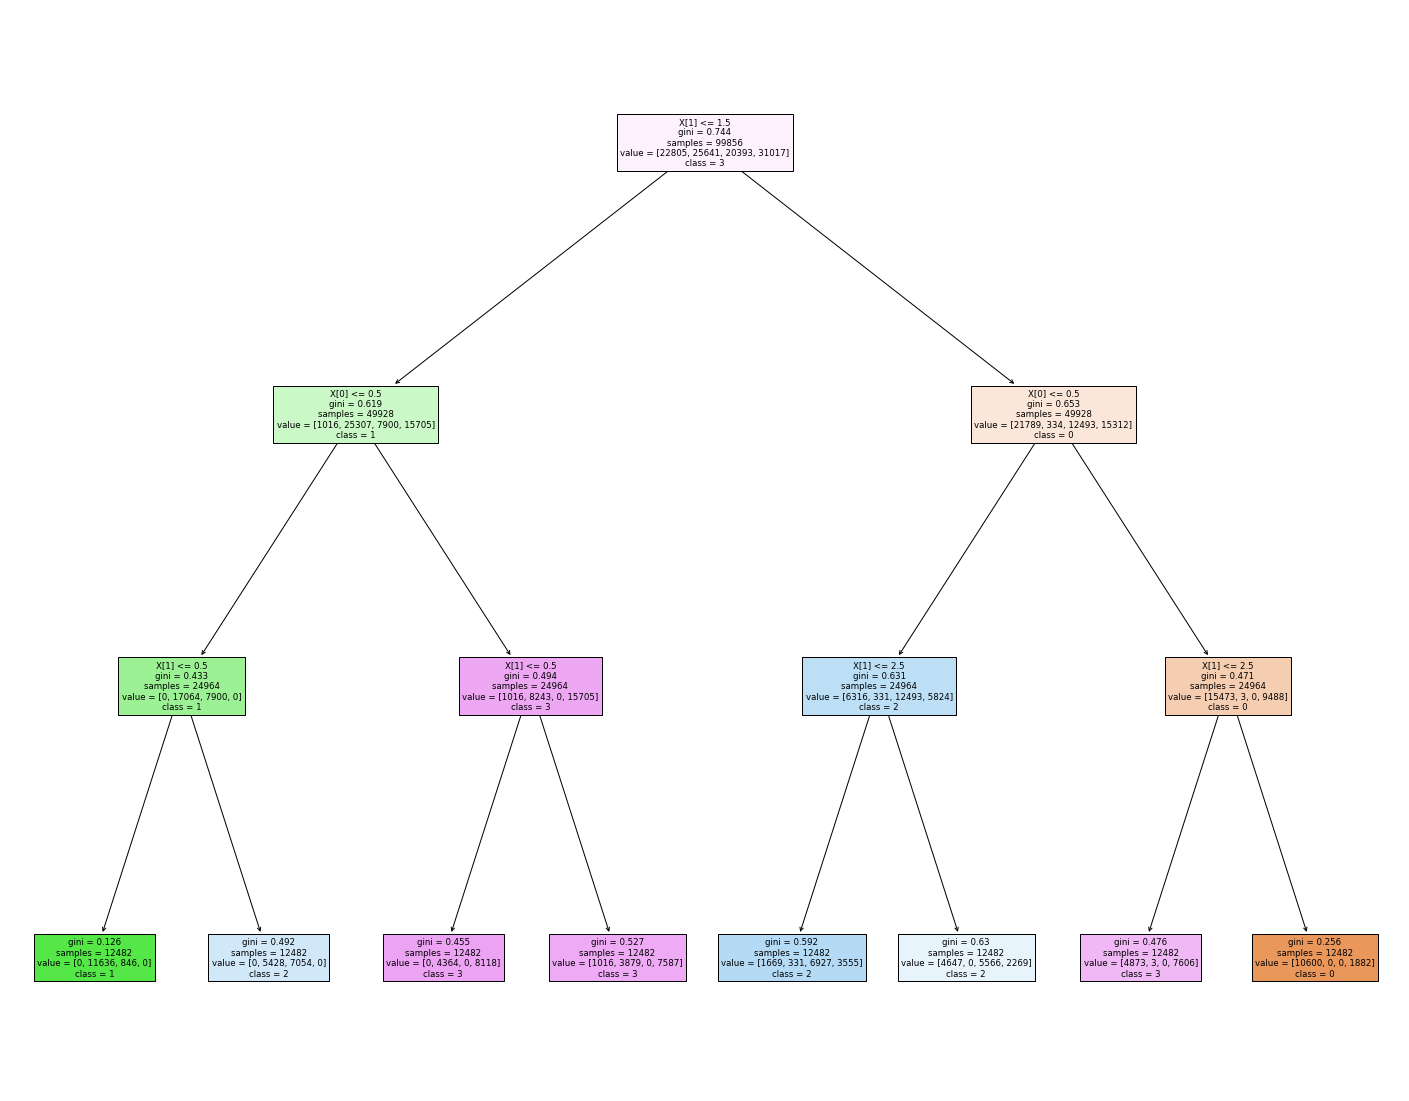

In [31]:
# Visualizing the DT
plt = visualize_tree(env,Tree)
plt.savefig("simple_maze_3_by_5_tree.png")

In [32]:
# Testing DT against ANN for accuracy
test_tree(env,model,Tree,10000)

100%|████████████████████████████████████| 10000/10000 [00:21<00:00, 474.01it/s]

Instances checked: 10000
Predictions matched: 5890
Accuracy: 58.9%


## DQN 100000 Episodes

In [33]:
# Training an RL agent in the environment using given algorithm
model, agent = algo.dqn(env,100000)

Training for 100000 steps ...
Interval 1 (0 steps performed)


/usr/local/lib/python3.9/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


10000/10000 [==============================] - 118s 12ms/step - reward: -1.4062
237 episodes - episode_reward: -59.329 [-1856.000, 38.000] - loss: 17.268 - mse: 276.354 - mean_q: -15.733

Interval 2 (10000 steps performed)
10000/10000 [==============================] - 119s 12ms/step - reward: -0.8390
366 episodes - episode_reward: -22.541 [-1049.000, 36.000] - loss: 27.804 - mse: 449.724 - mean_q: -22.937

Interval 3 (20000 steps performed)
10000/10000 [==============================] - 122s 12ms/step - reward: -0.6838
428 episodes - episode_reward: -16.297 [-1212.000, 38.000] - loss: 19.487 - mse: 129.097 - mean_q: -11.293

Interval 4 (30000 steps performed)
10000/10000 [==============================] - 128s 13ms/step - reward: -0.3238
478 episodes - episode_reward: -6.772 [-600.000, 36.000] - loss: 16.516 - mse: 53.969 - mean_q: -6.608

Interval 5 (40000 steps performed)
10000/10000 [==============================] - 127s 13ms/step - reward: -0.1048
500 episodes - episode_reward: -

In [34]:
# Generating dataset for ANN to DT conversion
!rm "simple_maze_3_by_5_data.csv"
filename = "simple_maze_3_by_5_data.csv"
dataset(env,model,filename)

100%|████████████████████████████████████| 99856/99856 [03:01<00:00, 549.71it/s]


In [35]:
# Building DT from the dataset
Tree = build_tree(env,filename)

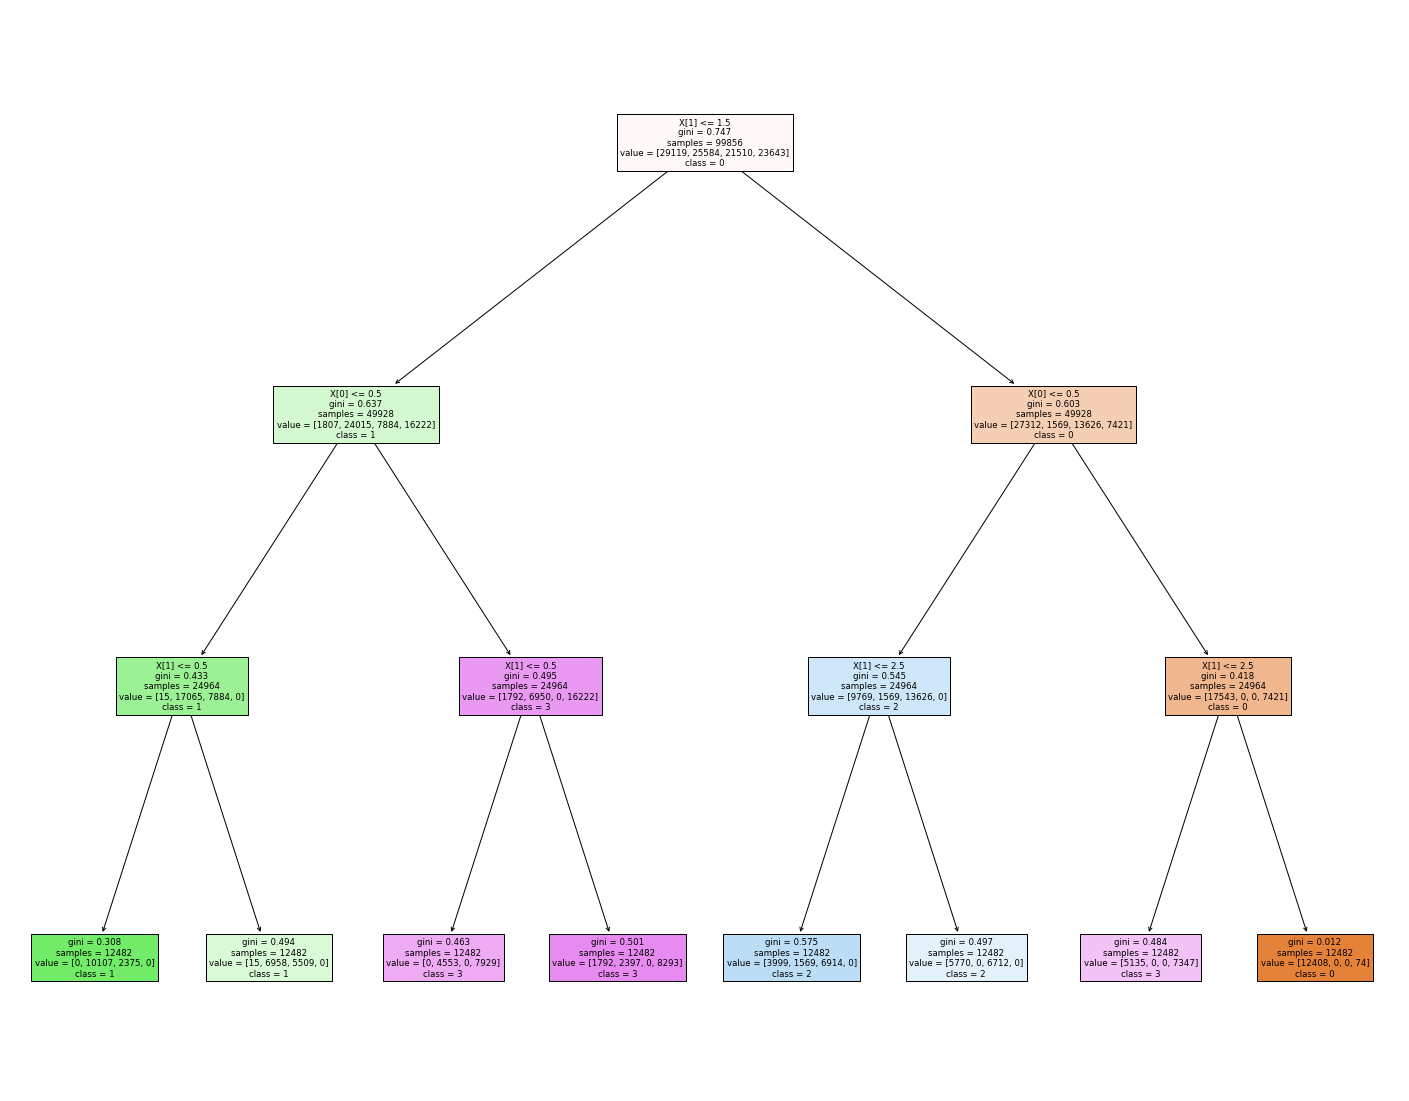

In [36]:
# Visualizing the DT
plt = visualize_tree(env,Tree)
plt.savefig("simple_maze_3_by_5_tree.png")

In [37]:
# Testing DT against ANN for accuracy
test_tree(env,model,Tree,10000)

100%|████████████████████████████████████| 10000/10000 [00:21<00:00, 469.42it/s]

Instances checked: 10000
Predictions matched: 6355
Accuracy: 63.55%
